In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications import InceptionV3,VGG16,ResNet50,MobileNetV2, NASNetMobile, Xception
from tensorflow.keras.applications import NASNetLarge, InceptionResNetV2, DenseNet121, EfficientNetB2, EfficientNetB3, EfficientNetV2L, EfficientNetV2M
#https://keras.io/api/applications/
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers as lay

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np

import os
import numpy as np
import matplotlib.pyplot as plt
import pathlib

import shutil
import zipfile
import urllib
import urllib.request
import glob
from google.colab import files

Saving 31579-Images-2022-05-26-0002-0000009-024.jpg to 31579-Images-2022-05-26-0002-0000009-024 (3).jpg
saved file: 31579-Images-2022-05-26-0002-0000009-024.jpg


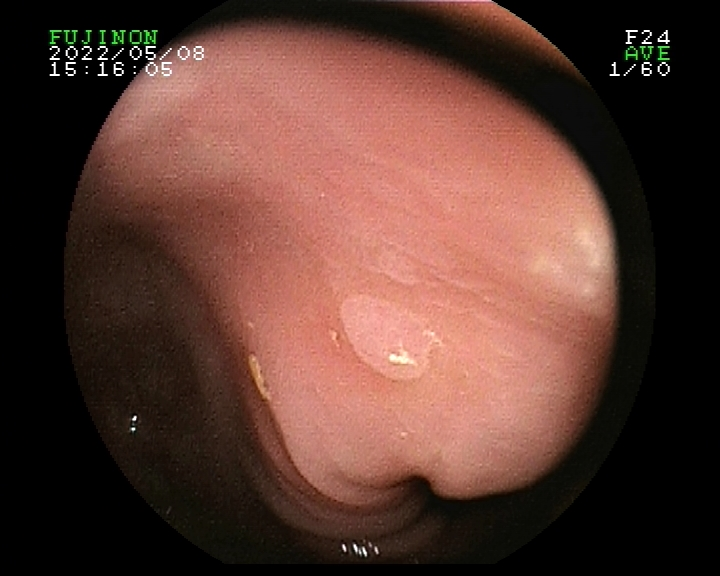

'Predicted class: 2'

In [16]:
from google.colab import files
from IPython.display import display, Image
from PIL import Image as pil_image
import numpy as np
import tensorflow as tf

# Load the saved model
model = tf.saved_model.load('/content/drive/MyDrive/GastroInference')

def process_file(file_path):
    # Load the image
    img = pil_image.open(file_path)
    img = img.resize((224, 224))
    img_arr = np.array(img) / 255.0
    img_arr = img_arr.reshape(1, 224, 224, 3).astype('float32')
    
    # Run the inference
    input_tensor = tf.convert_to_tensor(img_arr)
    output = model(input_tensor)
    predicted_class = np.argmax(output)
    
    # Display the image and prediction
    display(Image(filename=file_path, width=200))
    display('Predicted class: {}'.format(predicted_class))
    

uploaded = files.upload()

for name, data in uploaded.items():
    with open(name, 'wb') as f:
        f.write(data)
    print('saved file:', name)
    process_file(name)
